In [5]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator

In [6]:
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
model = BayesianNetwork([('age','trestbps'),('age','fbs'),('sex','trestbps'),('trestbps','target'),('fbs','target'),('target','ca'),('target','chol')])
model.fit(heart,estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)
for i in model.get_cpds():
    print(i)

+---------+------------+
| age(29) | 0.00330033 |
+---------+------------+
| age(34) | 0.00660066 |
+---------+------------+
| age(35) | 0.0132013  |
+---------+------------+
| age(37) | 0.00660066 |
+---------+------------+
| age(38) | 0.00990099 |
+---------+------------+
| age(39) | 0.0132013  |
+---------+------------+
| age(40) | 0.00990099 |
+---------+------------+
| age(41) | 0.0330033  |
+---------+------------+
| age(42) | 0.0264026  |
+---------+------------+
| age(43) | 0.0264026  |
+---------+------------+
| age(44) | 0.0363036  |
+---------+------------+
| age(45) | 0.0264026  |
+---------+------------+
| age(46) | 0.0231023  |
+---------+------------+
| age(47) | 0.0165017  |
+---------+------------+
| age(48) | 0.0231023  |
+---------+------------+
| age(49) | 0.0165017  |
+---------+------------+
| age(50) | 0.0231023  |
+---------+------------+
| age(51) | 0.039604   |
+---------+------------+
| age(52) | 0.0429043  |
+---------+------------+
| age(53) | 0.0264026  |


In [8]:
q = infer.query(variables=['target'],evidence={'trestbps':160})
print(q)


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5118 |
+-----------+---------------+
| target(1) |        0.4882 |
+-----------+---------------+


In [9]:
q = infer.query(variables=['target'],evidence={'age':30})
print(q)

C:\Users\vinayak\anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:531: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  UserWarning,



+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5591 |
+-----------+---------------+
| target(1) |        0.4409 |
+-----------+---------------+


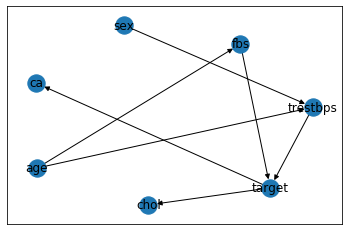

In [10]:
import networkx as nx
nx.draw_networkx(model)